In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
raw_data = pd.read_csv('data/crime_incidence_2020-10-31.csv')
raw_data['OCCURRED_ON_DATE'] = pd.to_datetime(raw_data['OCCURRED_ON_DATE']) # convert to datetime object
print(raw_data.shape)

# drop rows missing lat/long info
raw_data = raw_data.dropna(subset=["Lat"])
raw_data = raw_data.drop(index = raw_data[(raw_data['Lat'] < 42)].index.values)
print(raw_data.shape)

/Users/janetli/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(526340, 17)
(495648, 17)


In [22]:
raw_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1,S97333701,3301,NaN,VERBAL DISPUTE,C6,915,0,2020-07-18 14:34:00,2020,7,Saturday,14,NaN,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
5,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"


In [7]:
raw_data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [58]:
raw_data['OFFENSE_CODE_GROUP'].value_counts().head(20)

Motor Vehicle Accident Response    41310
Larceny                            33671
Medical Assistance                 31223
Investigate Person                 23759
Other                              22673
Simple Assault                     20113
Drug Violation                     19493
Vandalism                          19425
Verbal Disputes                    17550
Investigate Property               14429
Towed                              14224
Larceny From Motor Vehicle         13185
Property Lost                      12835
Warrant Arrests                    10036
Aggravated Assault                  9935
Fraud                               8081
Missing Person Located              7150
Residential Burglary                6857
Violations                          6656
Auto Theft                          5793
Name: OFFENSE_CODE_GROUP, dtype: int64

In [9]:
raw_data['DISTRICT'].value_counts()

B2     67967
C11    57306
D4     55170
B3     48272
A1     47718
C6     31043
D14    26814
E13    23442
E18    23373
E5     17746
A7     17175
A15     8644
Name: DISTRICT, dtype: int64

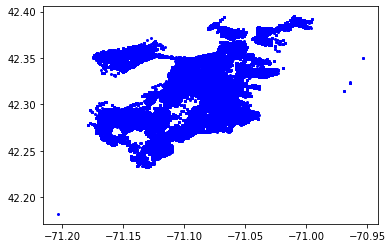

In [30]:
plt.plot(raw_data["Long"], raw_data["Lat"], 'bo', markersize=2)

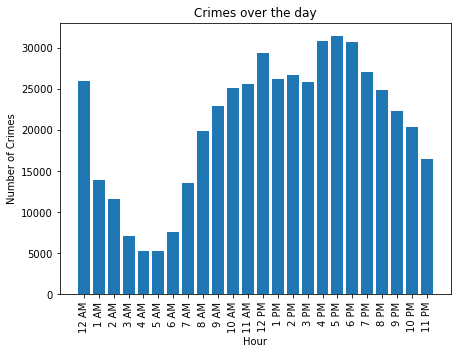

In [54]:
# plot crimes vs time of day
x = raw_data['HOUR'].value_counts().index.values
labels = []
for i in range(24):
    if i == 0:
        labels.append("12 AM")
    elif i == 12:
        labels.append("12 PM")
    elif i < 12:
        labels.append(str(i)+" AM")
    elif i > 12:
        labels.append(str(i-12) + " PM")
plt.figure(figsize=[7,5])
plt.bar(x, raw_data['HOUR'].value_counts())
plt.xticks(ticks=range(24), labels=labels, rotation=90)
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.title('Crimes over the day')
plt.show()

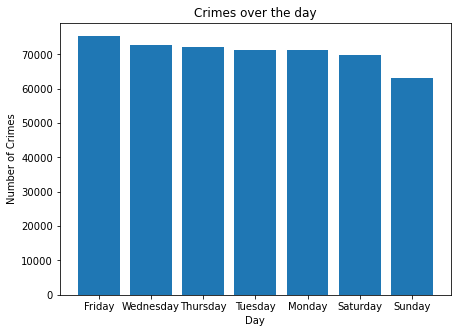

In [63]:
# plot crime over week
plt.figure(figsize=[7,5])
plt.bar(raw_data['DAY_OF_WEEK'].value_counts().index.values, raw_data['DAY_OF_WEEK'].value_counts())
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.title('Crimes over the week')
plt.show()

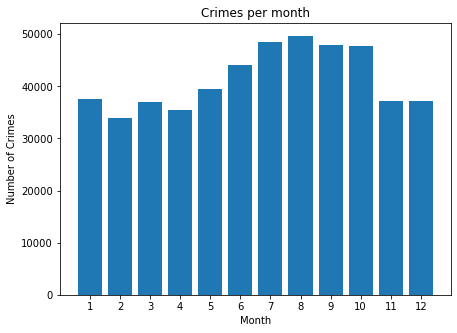

In [68]:
# plot crime over month
plt.figure(figsize=[7,5])
plt.bar(raw_data['MONTH'].value_counts().index.values, raw_data['MONTH'].value_counts())
plt.xticks(ticks=range(1,13))
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Crimes per month')
plt.show()

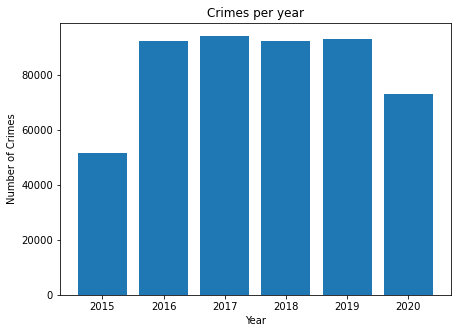

In [69]:
plt.figure(figsize=[7,5])
plt.bar(raw_data['YEAR'].value_counts().index.values, raw_data['YEAR'].value_counts())
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crimes per year')
plt.show()

In [72]:
raw_data['OCCURRED_ON_DATE'] = pd.to_datetime(raw_data['OCCURRED_ON_DATE'])

In [78]:
raw_data.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                 object
SHOOTING                       object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
UCR_PART                       object
STREET                         object
Lat                           float64
Long                          float64
Location                       object
dtype: object